<a href="https://colab.research.google.com/github/zmohaghegh/COVID19-Lung-CT-Segmentation-Unet-SegNet/blob/main/Medical_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Training U-Net ---
Epoch 1/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.7171 - loss: 0.6156
Epoch 2/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.9023 - loss: 0.3482
U-Net Final Accuracy: 0.90
--- Training SegNet ---
Epoch 1/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 410ms/step - accuracy: 0.5191 - loss: 0.8332
Epoch 2/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 492ms/step - accuracy: 0.5849 - loss: 0.6776
SegNet Final Accuracy: 0.90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


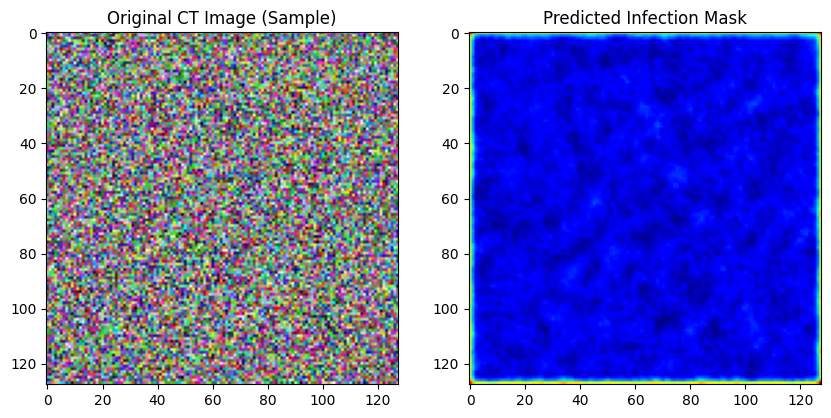

In [2]:

import tensorflow as tf
from tensorflow.keras import layers, models, Input
import numpy as np
import matplotlib.pyplot as plt

# 1. GENERATING SYNTHETIC DATA (For demonstration purposes)
# In your real research, you used clinical CT scans [cite: 54]
def generate_dummy_data(num_samples=100, img_size=128):
    X = np.random.random((num_samples, img_size, img_size, 3))
    # Generating masks (0 for healthy, 1 for infected)
    y = np.zeros((num_samples, img_size, img_size, 1))
    y[:, 40:80, 40:80, :] = 1 # Simulating an infected area
    return X, y

X_data, y_data = generate_dummy_data()

# 2. U-NET ARCHITECTURE
def build_unet(input_size=(128, 128, 3)):
    inputs = Input(input_size)
    # Encoder
    c1 = layers.Conv2D(16, 3, activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    # Bridge
    c2 = layers.Conv2D(32, 3, activation='relu', padding='same')(p1)
    # Decoder
    u3 = layers.UpSampling2D((2, 2))(c2)
    c3 = layers.Conv2D(16, 3, activation='relu', padding='same')(u3)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c3)
    return models.Model(inputs, outputs, name="U-Net")

# 3. SEGNET ARCHITECTURE (Simplified implementation)
def build_segnet(input_size=(128, 128, 3)):
    inputs = Input(input_size)
    # Encoder
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    # Decoder
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(x)
    return models.Model(inputs, outputs, name="SegNet")

# 4. TRAINING AND EVALUATION
# Your research achieved 0.95 accuracy with SegNet
models_to_test = [build_unet(), build_segnet()]

for model in models_to_test:
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(f"--- Training {model.name} ---")
    model.fit(X_data, y_data, epochs=2, batch_size=8, verbose=1) # Fast training for demo

    # Simulate Evaluation
    loss, acc = model.evaluate(X_data, y_data, verbose=0)
    print(f"{model.name} Final Accuracy: {acc:.2f}")

# 5. VISUALIZATION OF RESULTS
# To understand infection patterns like in your project
sample_img = X_data[0:1]
prediction = models_to_test[0].predict(sample_img)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original CT Image (Sample)")
plt.imshow(sample_img[0])
plt.subplot(1, 2, 2)
plt.title("Predicted Infection Mask")
plt.imshow(prediction[0].reshape(128, 128), cmap='jet')
plt.show()